COMP 5600/6600
Assignment 2 – Basic Machine Learning
Due: 10/09/2023 11:59 pm
Submission: On Canvas
Overview:
In this assignment, you will be implementing and analyzing three different machine
learning algorithms. Each algorithm will focus on a different problem scenario that
can be solved by different learning methods. You must implement all algorithms
from scratch using Python and should not use any external libraries other than
NumPy. You can use other libraries for data loading and pre-processing as necessary.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Problem 1] [25 Points]
Suppose that you are conducting a scientific experiment where you are observing
the effects of one variable (x_train.npy and x_test.npy) on the output (y_train.npy
and y_test.npy). On visualizing the relationship between the variables, you see the
following plot:
Your goal is to come up with a linear regression model that can take the training data
(x_train.npy and y_train.npy) and model the relationship between the variables x and
y. You should implement your own version of linear regression using gradient
descent. Things to consider:
1. Try to plot this relationship on your own using matplotlib. You can also
visualize the test data (x_test.npy and y_test.npy) to see if it gives you any
clues about the underlying relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following
questions:
a. Is the relationship linear?
b. Do you need feature engineering to add any non-linearity?
c. If so, how can you engineer these features?
d. What are some functions that you can try?
e. Plot each of them individually to verify!
You will need to write a short report detailing your thought process, the code you
wrote in Python to implement the linear regression model and the equation that
models the relationship between x and y that you found. You should provide
evidence that corroborates your final statement such as plots, prediction errors, etc.

In [ ]:
import numpy as np

class LinearRegression:

  def __init__ (self,lr= 0.1, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    #initializing weighs and bias to zero
    self.weights = np.zeros(n_features)
    self.bias = 0

    #Training model
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      #finding and updated the new wieghts and bias for gradient decent
      dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
      db = (1/n_samples) * np.sum(y_pred-y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self,X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

In [ ]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree=1, lr=0.1, n_iters=10000):
        self.degree = degree
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _transform_features(self, X):
        if self.degree == 1:
            return X
        else:
            from sklearn.preprocessing import PolynomialFeatures
            poly = PolynomialFeatures(degree=self.degree)
            X_poly = poly.fit_transform(X)
            return X_poly



    def fit(self, X, y):
        X_transformed = self._transform_features(X)
        n_samples, n_features = X_transformed.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X_transformed, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X_transformed.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        X_transformed = self._transform_features(X)
        y_pred = np.dot(X_transformed, self.weights) + self.bias
        return y_pred


/content/drive/MyDrive
Linear Regression MSE: 16.10104717579837
Polynomial Regression MSE: 16.303706001427408


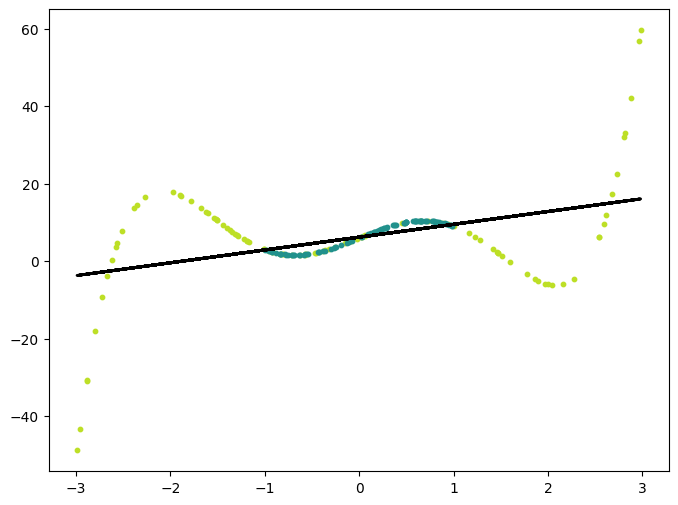

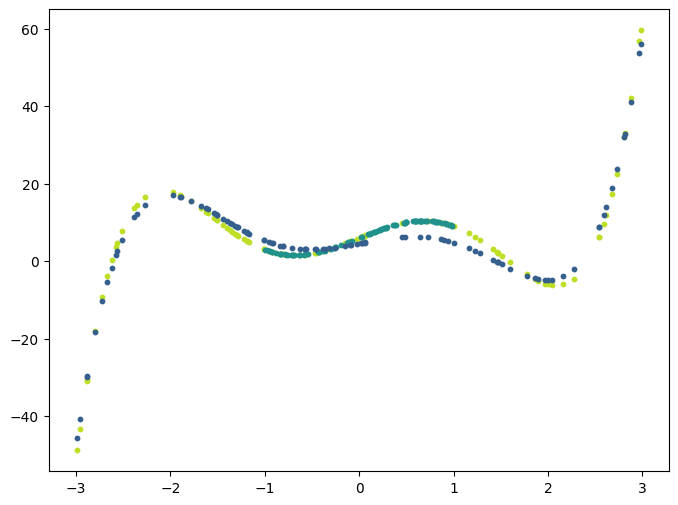

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


%cd /content/drive/MyDrive

x_test = np.load('x_test.npy')
x_train = np.load('x_train.npy')

y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

#linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)
predictions = reg.predict(x_test)

#Polyinomial Regression
poly_reg = PolynomialRegression(n_iters=20000,lr=0.0003,degree=5)
poly_reg.fit(x_train,y_train)


#calculating mean squared error
def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

mse_linear = mse(y_test, predictions)
print("Linear Regression MSE:", mse_linear)

# Calculate mean squared error for polynomial regression
predictions_poly = poly_reg.predict(x_test)
mse_poly = mse(y_test, predictions_poly)
print("Polynomial Regression MSE:", mse_poly)

#first order graph
y_pred_line = reg.predict(x_train)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(x_train,y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.plot(x_train, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

#5th order graph
y_pred_line_poly = poly_reg.predict(x_train)


cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.scatter(x_train, y_pred_line_poly, color=cmap(0.3), s=10, label= 'Prediction')
plt.show()





2.
  (a) no the relationship is not linear
  (b) yes you need to add feature engineering to better predict the data
  (c) to do this i increased to order of what was being predicted to 5 so that the prediction would better suit the data
  (d) to do this i changed the values of my parameters such as learning rate and number of iterations along with rewriting my linear regression class so that it could handle polynomials
  (e) above i have plotted them individually the first is the linear regression and the second being the polynomial regression showing that the relationship between x and y requires a 5th order polynomial

Report: when implementing my linear regression i notieced after ploting the given data that a linear regression model of the first degree would not work very well this is why i wrote the second class called polynomial regression in this class i was able to increase the degree to five to better suit the graph when doing the predictions. Based off the above graphs and after messing around with the number of degrees for the graph amoung other parameters i found that the relation ship between x and y from the given data is of the 5th order pair i say this because using 5th order is how i was able to most accurately predict the data


[Problem 2] [25 Points]
See the attached housing data (Asssignment2_NB_Data.xlsx). Each tab in the Excel
file contains training and test splits. Your goal is to construct a Naïve Bayes classifier
for this data.
1. Compute and show the conditional probability distribution for each feature.
Explain how you got these values and show your work. Note: You are
expected to do this part of the question by hand. Explain how you got the
probability distribution for at least two features in detail.
2. Using your conditional probability table, write a Python code that will
compute the probabilities for each example in the test data. Your program
should output the probabilities of each class as well as the final classification
based on the MAP rule. Note: You should hard-code the conditional
probabilities from the previous step into your code.
3. Analyze the performance of the code using different metrics (accuracy,
precision, recall, etc.) and briefly discuss your insights about the performance
of the approach (good or bad) and the merits of using one metric over the
other. You can use plots and other mechanisms to support your conclusions

1) 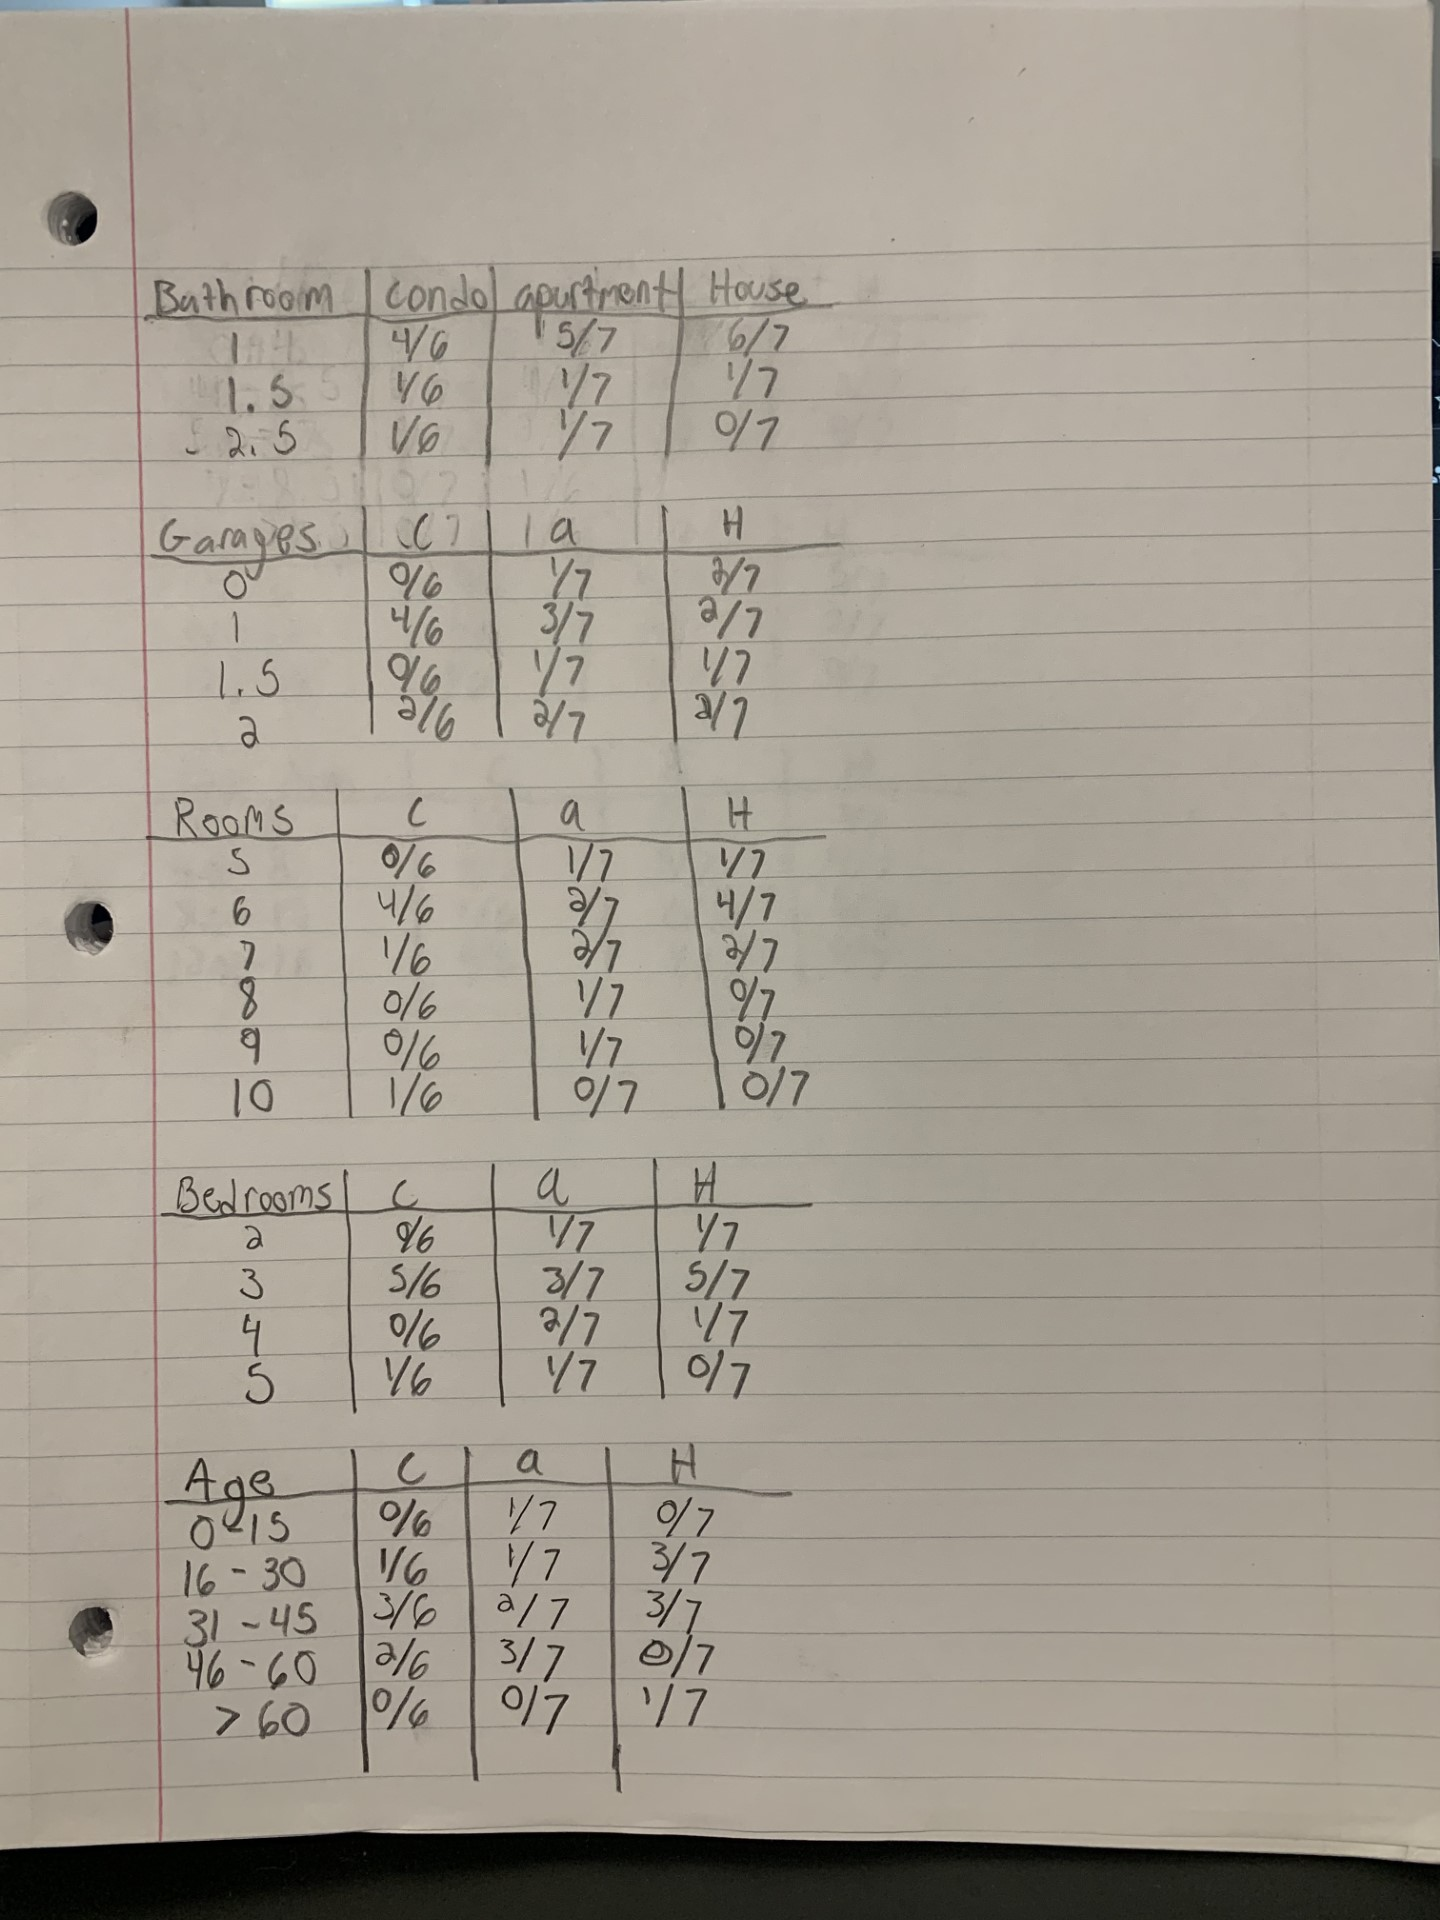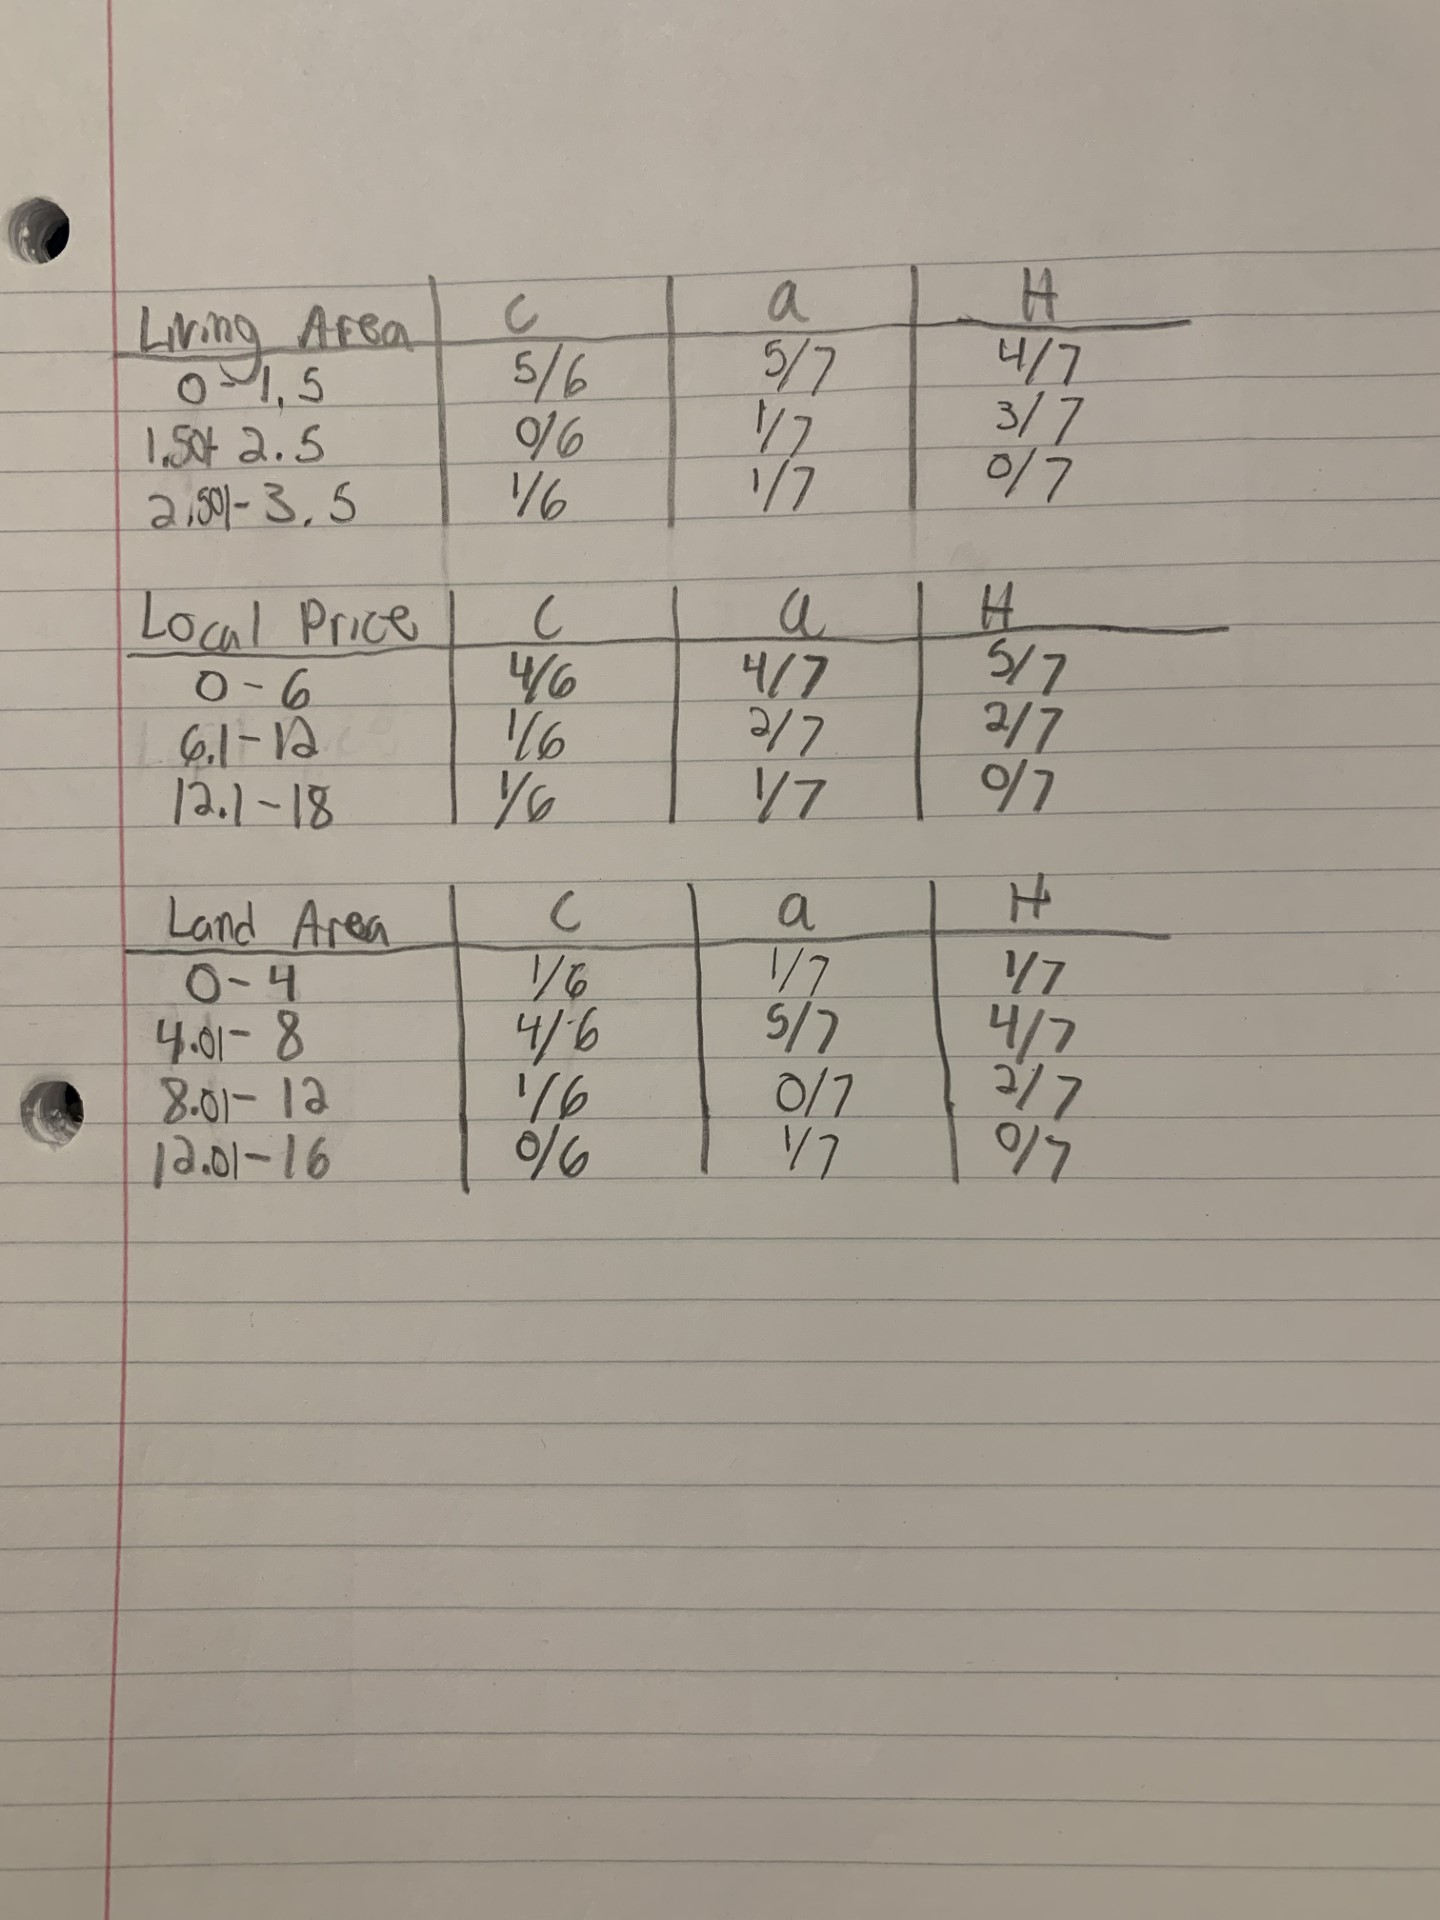

3) if i base the performace of my implementation on my performace metrics it is clear that i have poorly choosen my ranges for the probabilites since the accuracy was 0.2 i believe my naive bayes preformed very poorly using the provided data


In [ ]:
import numpy as np
import pandas as pd

class RangeDictionary:
    def __init__(self, data):
        self.data = data

    def __getitem__(self, key):
        for price_range, probability in self.data.items():
          min_price, max_price = price_range
          if min_price <= key <= max_price:
            return probability

        raise KeyError(f"No matching range found for key {key}")

p_condo = 6/20
p_apt = 7/20
p_house = 7/20

age_condo = {
    (0,15):0,
    (16,30):1/6,
    (31,45):3/6,
    (46,60):2/6,
    (61,70):0,
}
age_apartment = {
    (0,15):1/7,
    (16,30):1/7,
    (31,45):2/7,
    (46,60):3/7,
    (61,70):0,
}
age_houses = {
      (0,15):0,
      (16,30):3/7,
      (31,45):3/7,
      (46,60):0,
      (61,70):1/7,
}
age_probabilites = {
    'Condo': RangeDictionary(age_condo),
    'Apartment': RangeDictionary(age_apartment),
    'House': RangeDictionary(age_houses)
}


living_area_condo = {
    (0,1.5):5/6,
    (1.501,2.5):0,
    (2.501,3.5):1/6,
}
living_area_apartment = {
    (0,1.5):5/7,
    (1.501,2.5):1/7,
    (2.501,3.5):1/7,
}
living_area_houses = {
     (0,1.5):4/7,
     (1.501,2.5):3/7,
     (2.501,3.5):0,
}
Living_area_probabilites = {
    'Condo': RangeDictionary(living_area_condo),
    'Apartment': RangeDictionary(living_area_apartment),
    'House': RangeDictionary(living_area_houses)
}


local_price_condo = {
    (0,6):4/6,
    (6.01,12):1/6,
    (12.1,18):1/6,
}
local_price_apartment = {
    (0,6):4/7,
    (6.01,12):2/7,
    (12.1,18):1/7,
}
local_price_houses = {
    (0,6):5/7,
    (6.01,12):2/7,
    (12.1,18):0,
}
Local_price_probabilites = {
    'Condo': RangeDictionary(local_price_condo),
    'Apartment': RangeDictionary(local_price_apartment),
    'House': RangeDictionary(local_price_houses)
}

land_area_condo = {
    (0,4):1/6,
    (4.01,8):4/6,
    (8.01,12):1/6,
    (12.01,16):0,
}
land_area_apartment = {
    (0,4):1/7,
    (4.01,8):5/7,
    (8.01,12):0,
    (12.01,16):1/7,
    }
land_area_houses = {
    (0,4):1/7,
    (4.01,8):4/7,
    (8.01,12):2/7,
    (12.01,16):0,
}
Land_area_probabilites = {
    'Condo': RangeDictionary(land_area_condo),
    'Apartment': RangeDictionary(land_area_apartment),
    'House': RangeDictionary(land_area_houses)
}

conditional_probs = {
    'Bathrooms' : {
        'Condo': {
            '1.0':4/6,
            '1.5':1/6,
            '2.5':1/6,
        },
        'Apartment': {
            '1.0':5/7,
            '1.5':1/7,
            '2.5':1/7,
        },
        'House': {
            '1.0':6/7,
            '1.5':1/7,
            '2.5':0,
      }
  },
    '# Garages': {
        'Condo': {
            '0':0,
            '1.0':4/6,
            '1.5':0,
            '2.0':2/6,
        },
        'Apartment': {
            '0':1/7,
            '1.0':3/7,
            '1.5':1/7,
            '2.0':2/7,
        },
        'House': {
            '0':2/7,
            '1.0':2/7,
            '1.5':1/7,
            '2.0':2/7,
      }
  },
    '# Rooms': {
        'Condo': {
            '5':0,
            '6':4/6,
            '7':1/6,
            '8':0,
            '9':0,
            '10':1/6,
        },
        'Apartment': {
            '5':1/7,
            '6':2/7,
            '7':2/7,
            '8':1/7,
            '9':1/7,
            '10':0,
        },
        'House': {
            '5':1/7,
            '6':4/7,
            '7':2/7,
            '8':0,
            '9':0,
            '10':0,
      }
  },
    '# Bedrooms': {
        'Condo': {
            '2':0,
            '3':5/6,
            '4':0,
            '5':1/6,
        },
        'Apartment': {
            '2':1/7,
            '3':3/7,
            '4':2/7,
            '5':1/7,
        },
        'House': {
            '2':1/7,
            '3':5/7,
            '4':1/7,
            '5':0,
      }
  },
    'Land Area' : Land_area_probabilites,
    'Local Price' : Local_price_probabilites,
    'Age of home' : age_probabilites,
    'Living area' : Living_area_probabilites,
}

df = pd.read_excel('/content/drive/MyDrive/Asssignment2_NB_Data.xlsx', sheet_name='Test')
df['Bathrooms'] = df['Bathrooms'].astype(str)
df['# Garages'] = df['# Garages'].astype(str)
df['# Rooms'] = df['# Rooms'].astype(str)
df['# Bedrooms'] = df['# Bedrooms'].astype(str)

true_labels = []
predicted_labels = []

for index, row in df.iterrows():
  print(f"Row {index + 1}:")
  prob_condo = p_condo
  prob_apt = p_apt
  prob_house = p_house

  target = None


  for column, value in row.items():
    if column != "House ID" and column != "Construction type":
      condo = conditional_probs[column]["Condo"][value]
      apt = conditional_probs[column]["Apartment"][value]
      house = conditional_probs[column]["House"][value]
      print(column, ": Condo: ", condo)
      print(column, ": Apartment: ", apt)
      print(column, ": House: ", house)
      prob_condo = prob_condo * condo
      prob_apt = prob_apt * apt
      prob_house = prob_house * house
    elif column == "Construction type" :
      target = value

  #getting predicted labels by taking the max probability between Condo, Apartment, and House
  predicted_label = max(("Condo", prob_condo), ("Apartment", prob_apt), ("House", prob_house), key=lambda x: x[1])[0]

    # Append the true label and predicted label to the lists
  true_labels.append(target)
  predicted_labels.append(predicted_label)
  print("Probability it is a Condo:", prob_condo)
  print("Probability it is a Apartment:", prob_apt)
  print("Probability it is a House:", prob_house)
  print('-'*40)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Row 1:
Local Price : Condo:  0.16666666666666666
Local Price : Apartment:  0.2857142857142857
Local Price : House:  0.2857142857142857
Bathrooms : Condo:  0.16666666666666666
Bathrooms : Apartment:  0.14285714285714285
Bathrooms : House:  0.14285714285714285
Land Area : Condo:  0.6666666666666666
Land Area : Apartment:  0.7142857142857143
Land Area : House:  0.5714285714285714
Living area : Condo:  0
Living area : Apartment:  0.14285714285714285
Living area : House:  0.42857142857142855
# Garages : Condo:  0.6666666666666666
# Garages : Apartment:  0.42857142857142855
# Garages : House:  0.2857142857142857
# Rooms : Condo:  0.6666666666666666
# Rooms : Apartment:  0.2857142857142857
# Rooms : House:  0.5714285714285714
# Bedrooms : Condo:  0.8333333333333334
# Bedrooms : Apartment:  0.42857142857142855
# Bedrooms : House:  0.7142857142857143
Age of home : Condo:  0.5
Age of home : Apartment:  0.2857142857142857
Age of home : House:  0.42857142857142855
Probability it is a Condo: 0.0
Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Problem 3] [25 Points]
In this question, you will be using k-means to perform image compression.
Implement a naïve version of the k-means algorithm based on your understanding.
Your code must take the number of clusters k as input and perform k-means
clustering on the given image (test_image.png). Once the algorithm finishes running,
the cluster centroids represent the top-k common colors in the image. Iterate through
each pixel in the image and assign the closest color to each pixel. Save and visualize
the resulting image. For reading and writing images, you can use OpenCV, which is
an open-source computer vision toolkit. The following code will load the image into
a NumPy array. You can use this as input to your K-Means algorithm.
import cv2
img = cv2.imread(‘test_image.png’)
height, width, channels = np.shape(img)
for i in width:
for j in height:
pixel = img[j][i] # Read the pixel at location (i,j)
img[j][i] = newValue # Assign a new value to the pixel
Experiment with different values of k and briefly describe your thoughts about which
value works best for this problem. You can use plots, error bars, etc. to support your
conclusions

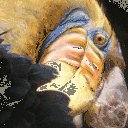

In [ ]:
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow

class ClusterPoint:
    def __init__(self, value=np.zeros(3, dtype=np.float32), cluster_id=0, color_id=0, position=[0, 0]):
        self.value = value
        self.cluster_id = cluster_id
        self.position = position

class Cluster:
    def __init__(self, centroid=np.zeros(3, dtype=np.float32), points=[], cluster_id=0, size=0):
        self.centroid = centroid
        self.points = points
        self.cluster_id = cluster_id
        self.size = size

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def k_means_clustering(k, image_path):
    img = cv2.imread(image_path)
    height, width, channels = np.shape(img)
    clusters = []
    cluster_points = []

    # Initialize clusters with random centroids
    for cluster_idx in range(k):
        random_i = random.randint(0, width - 1)
        random_j = random.randint(0, height - 1)
        initial_value = img[random_j][random_i]
        cluster = Cluster(centroid=initial_value, cluster_id=cluster_idx)
        clusters.append(cluster)

    # Assign pixels to their nearest initial clusters
    for i in range(width):
        for j in range(height):
            pixel = img[j][i]
            point = ClusterPoint(value=pixel, position=[i, j])
            min_distance = float('inf')
            min_cluster_index = None
            for cluster_idx in range(len(clusters)):
                distance = euclidean_distance(point.value, clusters[cluster_idx].centroid)
                if distance < min_distance:
                    min_distance = distance
                    min_cluster_index = clusters[cluster_idx].cluster_id
            point.cluster_id = min_cluster_index
            clusters[min_cluster_index].size += 1
            cluster_points.append(point)

    # Update cluster centroids
    for cluster in clusters:
        total_b = 0
        total_g = 0
        total_r = 0
        count = 0
        for cluster_point in cluster_points:
            if cluster_point.cluster_id == cluster.cluster_id:
                total_b += cluster_point.value[0]
                total_g += cluster_point.value[1]
                total_r += cluster_point.value[2]
                count += 1
        if count != 0:
            cluster.size = count
            cluster.centroid[0] = total_b / count
            cluster.centroid[1] = total_g / count
            cluster.centroid[2] = total_r / count
        else:
            cluster.size = 0

    # Iterate until convergence
    converged = False
    while not converged:
        old_clusters = clusters
        for point in cluster_points:
            min_distance = float('inf')
            min_cluster_index = None
            for cluster_idx in range(len(clusters)):
                distance = euclidean_distance(point.value, clusters[cluster_idx].centroid)
                if distance < min_distance:
                    min_distance = distance
                    min_cluster_index = clusters[cluster_idx].cluster_id
            point.cluster_id = min_cluster_index
            clusters[min_cluster_index].size += 1

        # Update cluster centroids
        for cluster in clusters:
            total_b = 0
            total_g = 0
            total_r = 0
            count = 0
            for cluster_point in cluster_points:
                if cluster_point.cluster_id == cluster.cluster_id:
                    total_b += cluster_point.value[0]
                    total_g += cluster_point.value[1]
                    total_r += cluster_point.value[2]
                    count += 1
            if count != 0:
                cluster.size = count
                cluster.centroid[0] = total_b / count
                cluster.centroid[1] = total_g / count
                cluster.centroid[2] = total_r / count
            else:
                cluster.size = 0

        num_equal = 0
        for i in range(len(clusters)):
            if (np.array_equal(clusters[i].centroid, old_clusters[i].centroid)):
                num_equal += 1

        if num_equal == len(clusters):
            converged = True

    # Update image with new cluster values
    for point in cluster_points:
        new_value = clusters[point.cluster_id].centroid
        i, j = point.position
        img[j][i] = new_value

    return img

# Usage
image_result = k_means_clustering(70, "test_image.png")
cv2_imshow(image_result)



When expirimenting with different values of k i found that low numbers which lead to less clusters will result in sigifignat lose in the detail of the image so to fix this i slowly increased k until the resulting image was satisfactory. this is my i ended up using a pretty large value for my k in order to get as much detail from the original image as possible.